In [11]:
# import packages that we'll need

# library for data manipulation and analysis (especially data frames)
import pandas as pd
# library adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions 
import numpy as np
# library for visualisation
import matplotlib.pyplot as plt

In [12]:
# read in data and save in variable df
# df = dataframe
df = pd.read_csv("input/german_credit_data.csv", sep=",", index_col=0)

In [13]:
# look at data
# we have 1,000 data points
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [14]:
# show only head of data
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [15]:
# Description of columns
# Age (numeric)
# Sex (text: male, female)
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
# Housing (text: own, rent, or free)
# Saving accounts (text - little, moderate, quite rich, rich)
# Checking account (numeric, in DM - Deutsch Mark)
# Credit amount (numeric, in DM)
# Duration (numeric, in month)
# Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Look into data

In [16]:
# how many people have a good or bad risk?
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [17]:
# how much have people saved?
df["Saving accounts"].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

<Axes: ylabel='Risk'>

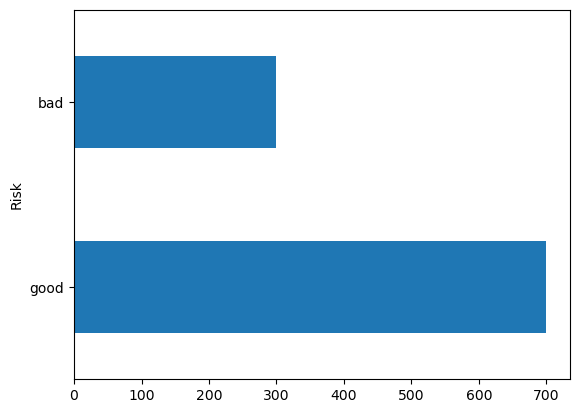

In [18]:
# visualise data as barplot
df['Risk'].value_counts().plot(kind='barh')

In [19]:
# what is the mean age?
df["Age"].mean()

35.546

In [20]:
# what is the mean credit amount?
df["Credit amount"].mean()

3271.258

<Axes: title={'center': 'Age'}, xlabel='Risk'>

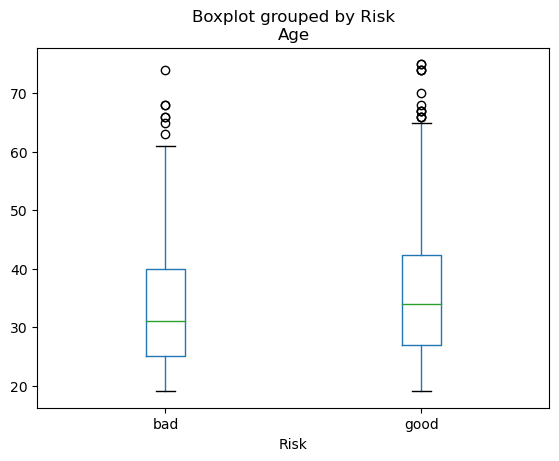

In [21]:
# visualise distribution of age for each risk group
df.boxplot(column="Age", by ="Risk", grid=False)

In [22]:
# select single columns
df_sex = df[["Sex", "Risk"]]
df_sex.head()

,Sex,Risk
0,male,good
1,female,bad
2,male,good
3,male,good
4,male,bad


# Decision Tree

In [23]:
# select only the first ten rows and save in new data frame
df_subset = df.head(10).copy()
df_subset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [24]:
# implement decision tree in a function called decision_tree which returns the predicted risk based on if checks
def decision_tree(row):
    if (row["Age"] < 30) | ((row["Purpose"] == "car") & (row["Age"] > 50)):
        return "bad"
    else:
        return "good"

In [25]:
# apply decision tree function to subset
df_subset['predicted_risk'] = df_subset.apply(decision_tree, axis=1)
df_subset

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,predicted_risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,bad
2,49,male,1,own,little,NaN,2096,12,education,good,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,good
4,53,male,2,free,little,little,4870,24,car,bad,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,good
7,35,male,3,rent,little,moderate,6948,36,car,good,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,good
9,28,male,3,own,little,moderate,5234,30,car,bad,bad


In [26]:
# select the following ten rows and save all twenty rows in a new dataframe df_subset2
df_subset2 = df.head(20).copy()
# apply decision tree function to this dataframe now
df_subset2['predicted_risk'] = df_subset2.apply(decision_tree, axis=1)
df_subset2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,predicted_risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,bad
2,49,male,1,own,little,NaN,2096,12,education,good,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,good
4,53,male,2,free,little,little,4870,24,car,bad,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,good
7,35,male,3,rent,little,moderate,6948,36,car,good,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good,good
9,28,male,3,own,little,moderate,5234,30,car,bad,bad


# Automatic Decision Tree

## Data Preprocessing

In [27]:
# get data types for each column. Automatic decision trees only work for numerical columns
df_numerical = df.copy()
df_numerical.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [28]:
# cast all object colums to category columns
for col in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
    df_numerical[col] = df_numerical[col].astype('category')

In [29]:
# transform categorical columns to numerical columns
cat_columns = df_numerical.select_dtypes(['category']).columns
df_numerical[cat_columns] = df_numerical[cat_columns].apply(lambda x: x.cat.codes)

In [30]:
df_numerical.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,-1,0,1169,6,5,good
1,22,0,2,1,0,1,5951,48,5,bad
2,49,1,1,1,0,-1,2096,12,3,good
3,45,1,2,0,0,0,7882,42,4,good
4,53,1,2,0,0,0,4870,24,1,bad


## Create Decision Tree

In [31]:
# import sklearn package (machine learning library: https://scikit-learn.org/stable/)
# conda install -c anaconda scikit-learn to install package with Anaconda
from sklearn import tree

In [32]:
# select those columns which should be considered as features
feature_cols = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration", "Purpose"]

In [33]:
# describe feature columns and target variable (risk column)
features = df_numerical[feature_cols]
target = df_numerical.Risk

In [34]:
#train classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, target)

[Text(0.3829724542025862, 0.9782608695652174, 'x[5] <= -0.5\ngini = 0.42\nsamples = 1000\nvalue = [300, 700]'),
 Text(0.12419181034482758, 0.9347826086956522, 'x[6] <= 3891.0\ngini = 0.206\nsamples = 394\nvalue = [46, 348]'),
 Text(0.06088362068965517, 0.8913043478260869, 'x[0] <= 22.5\ngini = 0.152\nsamples = 301\nvalue = [25, 276]'),
 Text(0.017241379310344827, 0.8478260869565217, 'x[7] <= 16.5\ngini = 0.473\nsamples = 13\nvalue = [5, 8]'),
 Text(0.008620689655172414, 0.8043478260869565, 'x[0] <= 19.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.004310344827586207, 0.7608695652173914, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.01293103448275862, 0.7608695652173914, 'x[8] <= 4.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.008620689655172414, 0.717391304347826, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.017241379310344827, 0.717391304347826, 'x[6] <= 1182.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01293103448275862, 0.6739130434782609, 'g

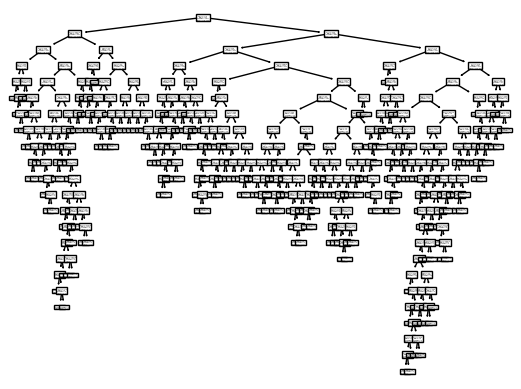

In [35]:
# textual representation of tree
tree.plot_tree(clf) 

## Visualise data tree

In [36]:
# import new packages for visualisation
# conda install -c anaconda graphviz 
# conda install -c conda-forge pydotplus 
# pip install graphviz 
# pip install pydotplus 
import graphviz #if graphvis is giving you trouble go here and install, might need to restart your computer after https://graphviz.gitlab.io/_pages/Download/
import pydotplus

In [37]:
# create data tree with some nice features (color, nicer font) and save in png
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=feature_cols,  
                                class_names=target,  
                                filled=True,
                                rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('mydecisiontree.png')

#Rank <= if correct, will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

#gini = refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

#samples = 13 means that there are 13 people left at this point in the decision, which is all of them since this is the first step.

#value = [6, 7] means that of these 13 people, 6 will get a "NO", and 7 will get a "GO".


(process:20256): GLib-GIO-WARNING **: 11:06:25.855: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2309.16.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:20256): GLib-GIO-WARNING **: 11:06:25.885: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



True